# Домашняя работа 6. Классификация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #6: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн**: 4.12.2017 01:00 OMSK

    После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

**Рассылка решений**: 9.12.2017 17:00 OMSK

    После рассылки задания совсем не имеют веса.

### Полезная литература

- [ODS - классификация](https://habrahabr.ru/company/ods/blog/322534/)
- [Коллаборативная фильтрация - рекомендательная система](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F)
- [Метрики расстояний - косинусная, минковского, проклятье размерности ](http://www.machinelearning.ru/wiki/images/9/9a/Sem1_knn.pdf)
- [Offtop: метрики качества рекомендаьельных систем](https://habrahabr.ru/company/dca/blog/281066/)
- [Байесовский классификатор](http://www.machinelearning.ru/wiki/index.php?title=%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80)
- [Интересная статья про спам/не спам](https://habrahabr.ru/post/252265/)

Если вам понравилась задача распознавания текстов, то вот подборочка:

- [библиотека Gensim](https://radimrehurek.com/gensim/)
- [библиотека nltk](http://www.nltk.org/)
- [Лекция про word2vec 🔥](https://www.youtube.com/watch?v=oBb9aFmp0Hs)
- [Лекция Векторные представления слов и документов 🔥](https://www.youtube.com/watch?v=hiDBnEyoZS4)

В этой практике мы будем использовать алгоритмы k ближайших соседей и наивный байес для задач классификации и не только. 

## kNN - ближайшие соседи

Мы уже видели с вами на практиках и лекциях как применять алгоритм ближайших соседей. Мы даже видели с вами на примере классификации sms-спама, что этот метрический алгоритм не всегда справляется с многомерными данными. Поэтому в домашнем задании мы с вами сконцентриуемся на другой задаче, котоую можно решить этим алгоритмом: вы построите рекомендательную систему.

### Рекомендательная система

Будем использовать известный нам [датасет с оценками фильмов](http://www.cs.umn.edu/GroupLens). Только в этот раз мы не будем кластеризовывать жанры, а будем рекомендовать похожие фильмы, основываясь на оценках других пользователей. То есть мы будем по факту предсказывать предпочтение нового пользователя на основе других.

Для рекомендательной системы в датасете в объектами будут пользователи, а признаками - оценки фильма данным пользователем.

![](https://i.imgur.com/hn3xjZl.png)

Мы будем использовать метрический алгоритм для поиска ближайших соседей, тем самым рекомендовать фильмы близкие к данному.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies = pd.read_csv('data/imdb_movies.csv.gz', index_col='movieId')
ratings = pd.read_csv('data/imdb_ratings.csv.gz')

print(movies.shape)
print(ratings.shape)

(9125, 2)
(100004, 4)


In [3]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### 1.1 Поиск популярных фильмов (3 балла)

Среди всех фильмов есть не популярные, для которых выставлена 1-2 оценки. Такого количества данных не достаточно, поэтому нужно срезать много фильмов с маленьким числом отзывов.

Посчитайте количество оценок для каждого фильма.

In [5]:
ratings['movieId'].value_counts()

356       341
296       324
318       311
593       304
260       291
480       274
2571      259
1         247
527       244
589       237
1196      234
110       228
1270      226
608       224
2858      220
1198      220
780       218
1210      217
588       215
457       213
2959      202
590       202
50        201
47        201
4993      200
858       200
150       200
364       200
380       198
32        196
         ... 
98160       1
6109        1
120805      1
131168      1
73860       1
60674       1
104595      1
133281      1
155820      1
26797       1
47287       1
8420        1
61250       1
3870        1
5917        1
1759        1
26323       1
32464       1
65216       1
65088       1
73276       1
7708        1
69118       1
110058      1
140763      1
48520       1
111913      1
1311        1
27922       1
2049        1
Name: movieId, Length: 9066, dtype: int64

Выведите сводную статистику по количеству оценок фильмов. (общее число фильмов, среднее количество оценок, дисперсию, квантили)

In [6]:
ratings['movieId'].value_counts().describe()

count    9066.000000
mean       11.030664
std        24.050800
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       341.000000
Name: movieId, dtype: float64

Как мы видим `75%` квантиль показывет, что `75%` фильмов имело очень мало оценок. Нам столько будет недостаточно. Посчитайте квантили в диапазоне от `75%` до `100%` с шагом в `1%`. Выберите тот квантиль, при котором количество оценок равно 20. Напишите какой это квантиль. Напишите сколько всего фильмов останется, если отбросить все фильмы у которых ??? рейтинг меньше этого квантиля ?? думаю тут надо исправить на - количество оценок меньше 20.

In [7]:
quantiles=[i / 100.0 for i in range(75, 100+1)]
ratings_quantiles = ratings['movieId'].value_counts().quantile(q=quantiles)
print(ratings_quantiles)

0.75      9.00
0.76     10.00
0.77     10.00
0.78     11.00
0.79     12.00
0.80     13.00
0.81     14.00
0.82     15.00
0.83     16.00
0.84     17.00
0.85     19.00
0.86     20.00
0.87     22.00
0.88     23.00
0.89     25.00
0.90     28.00
0.91     31.00
0.92     34.00
0.93     38.00
0.94     44.00
0.95     49.00
0.96     58.00
0.97     69.05
0.98     89.00
0.99    123.00
1.00    341.00
Name: movieId, dtype: float64


In [8]:
ratings_quantiles[ratings_quantiles >= 20].index.min()

0.85999999999999999

** Ответ : ** 86%

In [9]:
movieId_filtered = ratings['movieId'].value_counts()
movieId_filtered = movieId_filtered[movieId_filtered >= 20]

In [10]:
movieId_filtered

356      341
296      324
318      311
593      304
260      291
480      274
2571     259
1        247
527      244
589      237
1196     234
110      228
1270     226
608      224
2858     220
1198     220
780      218
1210     217
588      215
457      213
2959     202
590      202
50       201
47       201
4993     200
858      200
150      200
364      200
380      198
32       196
        ... 
1515      20
4343      20
65        20
74789     20
9         20
1620      20
2690      20
2598      20
3083      20
3201      20
262       20
51540     20
1354      20
1459      20
249       20
921       20
3882      20
54997     20
4865      20
8371      20
1189      20
3186      20
7099      20
3986      20
4007      20
1251      20
2463      20
6541      20
3328      20
96610     20
Name: movieId, Length: 1303, dtype: int64

In [11]:
movieId_filtered.count()

1303

** Ответ : ** Останется 1303 фильма

### 1.2 Соединяем таблицы (1 балл)

Будет немного не удобно искать фильмы по их идентификаторам, нам нужны названия. Поэтому соедините две таблицы `ratings` и `movies` по `movieId` и отфильтруйте отзывы на редкие фильмы, которые мы нашли в предыдущем шаге. Выведите первые 5 элементов полученного датасета.

In [12]:
df_result = pd.merge(ratings, movies.reset_index(), on='movieId')
df_result.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [13]:
df_result.shape

(100004, 6)

In [14]:
df_result = df_result[df_result["movieId"].isin(movieId_filtered.index)]
df_result.shape

(69104, 6)

In [15]:
df_result.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


### 1.3 Матрица Фильмы-Пользователи

В нашем случае мы будем искать похожие фильмы, поэтому сделайте из датасета оценок матрицу, где в строках фильмы, в колонках пользователи, а в ячейках оценки. Пропущенные значение, то есть отсутствие оценки, заполните 0.

Для увеличения скорости выполнения алгоритма ближайших соседей примените функцию [`scipy.sparse.csc_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html),  которая создаст плотное представление нашей разреженой матрицы.

In [16]:
df_movieId_title = df_result.groupby(['movieId','title']).size().reset_index().rename(columns={0:'count'})

In [17]:
df_movieId_title.head()

,movieId,title,count
0,1,Toy Story (1995),247
1,2,Jumanji (1995),107
2,3,Grumpier Old Men (1995),59
3,5,Father of the Bride Part II (1995),56
4,6,Heat (1995),104


In [18]:
df_movieId_title[df_movieId_title['movieId'] == 50]

,movieId,title,count
30,50,"Usual Suspects, The (1995)",201


In [19]:
df_pivot=df_result.pivot(index='movieId', columns='userId', values='rating')
df_pivot.fillna(0, inplace=True)
df_pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0


In [20]:
df_pivot.shape

(1303, 671)

In [21]:
from scipy.sparse import csr_matrix
mat = csr_matrix(df_pivot.as_matrix())
#mat = df_pivot.as_matrix()
print(mat)

  (0, 6)	3.0
  (0, 8)	4.0
  (0, 12)	5.0
  (0, 14)	2.0
  (0, 18)	3.0
  (0, 19)	3.5
  (0, 22)	3.0
  (0, 25)	5.0
  (0, 29)	4.0
  (0, 36)	4.0
  (0, 42)	4.0
  (0, 43)	4.0
  (0, 46)	5.0
  (0, 47)	4.0
  (0, 54)	3.0
  (0, 55)	4.0
  (0, 62)	5.0
  (0, 66)	3.0
  (0, 67)	4.0
  (0, 68)	5.0
  (0, 69)	5.0
  (0, 71)	3.5
  (0, 72)	5.0
  (0, 74)	3.0
  (0, 76)	4.0
  :	:
  (1301, 623)	4.0
  (1302, 14)	1.0
  (1302, 41)	2.0
  (1302, 55)	5.0
  (1302, 61)	5.0
  (1302, 90)	4.0
  (1302, 148)	5.0
  (1302, 250)	5.0
  (1302, 261)	2.5
  (1302, 271)	3.5
  (1302, 276)	4.0
  (1302, 286)	5.0
  (1302, 302)	4.0
  (1302, 333)	4.0
  (1302, 363)	5.0
  (1302, 370)	4.5
  (1302, 401)	3.5
  (1302, 474)	5.0
  (1302, 518)	3.5
  (1302, 525)	4.5
  (1302, 546)	4.0
  (1302, 566)	3.5
  (1302, 614)	5.0
  (1302, 624)	4.5
  (1302, 662)	4.0


### 1.4 Тренировка модели рекомендаций 

Так как по сути у нас нет каких-то меток классов, мы будем использовать алгоритма без учителя [`sklearn.neighbors.NearestNeighbors`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html). Научите его по данным нашей матрицы пользователей-фильмов и напишите **функцию**, принимающую на вход название фильма и возвращающую список из 6 рекомендованых фильмов, начиная от более похожего.

Для определения "похожести" двух фильмов мы будем использовать косинусную меру, вместо евклидова или минковского:

$$\LARGE cos(\overrightarrow{x},\overrightarrow{y}) = \frac{\overrightarrow{x} \cdot \overrightarrow{y}}{||\overrightarrow{x}|| \times ||\overrightarrow{y}||}$$

In [22]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10,algorithm='brute',metric='cosine')
neigh.fit(mat) 

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [23]:
def similar(name='Pulp Fiction (1994)', n=6):
    #movieId = df_result[df_result['title'] == name].iloc[0]['movieId']
    movieId = df_movieId_title[df_movieId_title['title'] == name]['movieId']
    coords = df_pivot.loc[movieId].values.reshape(1,-1)
    list_similar_indices = neigh.kneighbors(coords, n_neighbors=n, return_distance=False)[0]
    list_similar_movieIds = df_pivot.index[list_similar_indices]
    return df_movieId_title[df_movieId_title['movieId'].isin(list_similar_movieIds)]['title'].values.tolist()

Выведите рекомендации для фильмов:
- `Pulp Fiction (1994)`
- `Star Wars: Episode V - The Empire Strikes Back (1980)`
- `Lord of the Rings: The Two Towers, The (2002)`

In [24]:
similar('Pulp Fiction (1994)')

['Seven (a.k.a. Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'Pulp Fiction (1994)',
 'Shawshank Redemption, The (1994)',
 'Forrest Gump (1994)',
 'Silence of the Lambs, The (1991)']

In [25]:
similar('Star Wars: Episode V - The Empire Strikes Back (1980)')

['Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Back to the Future (1985)',
 'Indiana Jones and the Last Crusade (1989)']

In [26]:
similar('Lord of the Rings: The Two Towers, The (2002)')

['Matrix, The (1999)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Spider-Man (2002)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
 'Lord of the Rings: The Return of the King, The (2003)']

### 1.5 Как посчитать качество рекомендации?

Как посчитать качество нашей классификации? У нас нет учителя, нет отложенной выборки. Мы просто посчитали все рейтинги и на основе них сделали предположения о похожести товаров. 

А как вы думаете можно проверить качество нашей рекомендательной системы? Напишите развернутый ответ своими словами.

Качество рекомендательной системы лушче всего проверять по откликам - будут ли пользователи смотреть фильмы, которые система рекомендует им как похожие или с негодованием закроют такую рекомендацию. (Умнее уже не успеваю ничего написать.)

## Наивный байесовский классификатор

На практике мы использовали его для детекции спам/не спам. В этот раз вы будете классифицировать [новостные тексты](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html). Попробуете разные методы  генерации признаков из текстов.

In [27]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### 2.1 Загрузка данных (2 балла)

Мы будем использовать только 4 класса текстов: `'alt.atheism', 'sci.space', 'talk.religion.misc', 'comp.graphics'`.

Загрузите тренировочную и тестовую части датасета для этих категорий.

In [28]:
short_list_target_names = ['alt.atheism', 'sci.space', 'talk.religion.misc', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), 
                                      categories=short_list_target_names, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'),
                                    categories = short_list_target_names, shuffle=True, random_state=42)

Выведите по 1 тексту для каждой из категории.

In [29]:
for elem in np.unique(newsgroups_train.target):
    for ind,target in enumerate(newsgroups_train.target):
        if target == elem:
            print(elem, ",", newsgroups_train.target_names[target] )
            print(newsgroups_train.data[ind])
            print("----------")
            break

0 , alt.atheism
I have a request for those who would like to see Charley Wingate
respond to the "Charley Challenges" (and judging from my e-mail, there
appear to be quite a few of you.)  

It is clear that Mr. Wingate intends to continue to post tangential or
unrelated articles while ingoring the Challenges themselves.  Between
the last two re-postings of the Challenges, I noted perhaps a dozen or
more posts by Mr. Wingate, none of which answered a single Challenge.  

It seems unmistakable to me that Mr. Wingate hopes that the questions
will just go away, and he is doing his level best to change the
subject.  Given that this seems a rather common net.theist tactic, I
would like to suggest that we impress upon him our desire for answers,
in the following manner:

1. Ignore any future articles by Mr. Wingate that do not address the
Challenges, until he answers them or explictly announces that he
refuses to do so.

--or--

2. If you must respond to one of his articles, include within it


### 2.2 Мешок слов

Начнем с самого простого способа извлечения признаков из текстов: обычный подсчет количества употреблений слов в тексте.

Для этого используем [sklearn.feature_extraction.text.CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Настройте его так, чтобы он использовал англиские стоп слова.

Проведите трансформацию текстов из обоих датасетов и выведите размер полученного словаря. (1 векторайзер для тестового и тренировочного датасета! У вас должны получиться матрицы с одинаковыми признаками-словами)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [31]:
print(len(vectorizer.vocabulary_))

26576


In [32]:
vectors_test.shape

(1353, 26576)

In [33]:
vectors_train.shape

(2034, 26576)

Будем использовать классификатор для мультиклассифкации sklearn.naive_bayes.MultinomialNB.

- Проведите кроссвалидацию на 5 фолдах для метрики `accuracy`.
- обучите на тренировочных данных, 
- нарисуйте красивую confusion матрицу, (с именами классов, а не индексами по осям)
- выведите отчет классификации для тестовой выборки (с именами классов, а не индексами)

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [35]:
clf = MultinomialNB(alpha=.01)

In [36]:
#http://scikit-learn.org/stable/modules/model_evaluation.html
%time cross_val_score(clf, vectors_train, y_train, cv=5, scoring= 'accuracy').mean()

CPU times: user 72 ms, sys: 0 ns, total: 72 ms
Wall time: 72.7 ms


0.82694944287912509

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

                    precision    recall  f1-score   support

       alt.atheism       0.66      0.69      0.68       319
     comp.graphics       0.91      0.90      0.91       389
         sci.space       0.80      0.88      0.84       394
talk.religion.misc       0.65      0.53      0.59       251

       avg / total       0.77      0.78      0.77      1353



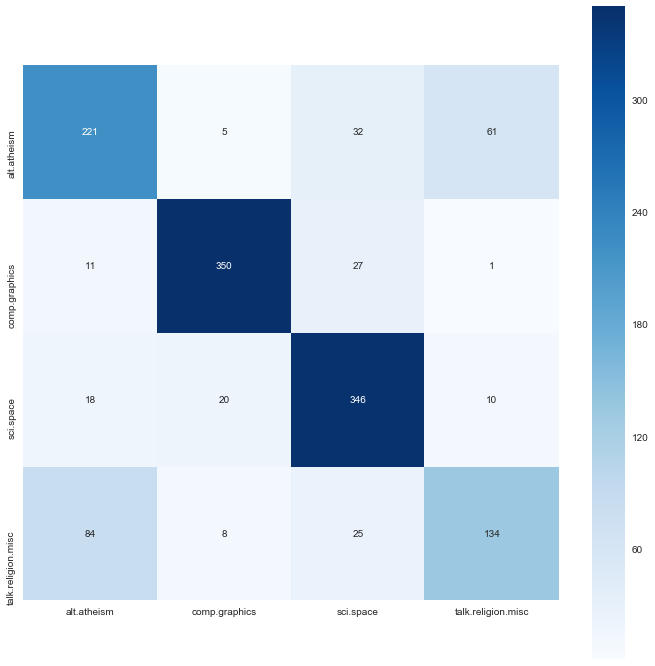

In [38]:
clf.fit(vectors_train, y_train)
y_pred = clf.predict(vectors_test).astype('int')

print(classification_report(y_test, y_pred, target_names = newsgroups_test.target_names))

df_conf_matrix=pd.DataFrame(confusion_matrix(y_test, y_pred), index=newsgroups_test.target_names,
                            columns = newsgroups_test.target_names)
plt.figure(figsize=(12,12))
sns.heatmap(df_conf_matrix, 
            cmap=plt.cm.Blues, square=True, annot=True, fmt='.3g', )

In [39]:
# Посмотрим на ТОП 10 по важности слова в каждой категории
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.coef_[i])[-10:]
        print("%s: [%s]" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: [like believe say atheism does just think don people god]
comp.graphics: [software images files data use file jpeg edu graphics image]
sci.space: [just shuttle time orbit data like earth launch nasa space]
talk.religion.misc: [know say christian think just bible don jesus people god]


### 2.3 [Tf-IDF](https://ru.wikipedia.org/wiki/TF-IDF)

Мешок слов не учитывает "веса" слов, он просто смотрит их вхождение в документ. Вероятно, было бы полезно взвесить каким-то обраом каждое слово в документе. Действительно, если слово встречается во всех документах, то, наверное, его вес небольшой. А если редкое слово встречается в некоторых документах, то скорее всего оно какое-то узко тематическое.

Один из способов взвесить слова - это использовать меру tf-idf, где:

**TF - term frequency** - частота слова для каждой статьи

$$\LARGE \mathrm{tf}(t,d) = \frac{n_t}{\sum_k n_k}$$

**IDF - inverse document frequency*** — обратная частота документа - уменьшает вес часто встречаемых слов

$$\LARGE \mathrm{idf}(t, D) =  \log \frac{|D|}{|\{\,d_i \in D \mid t \in d_{i}\, \}|}$$

$D$ - число документов в корпусе

$|\{\,d_i \in D \mid t \in d_{i}\, \}|$ - число документов из коллекции ${\displaystyle D}$ , в которых встречается ${\displaystyle t}$  (когда ${\displaystyle n_{t}\neq 0}$ ).

**TF-IDF**

$$\LARGE \operatorname{tf-idf}(t,d,D) = \operatorname{tf}(t,d) \times \operatorname{idf}(t, D)$$


Для него есть класс [sklearn.feature_extraction.text.TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

- Проведите кроссвалидацию на 5 фолдах для метрики `accuracy`.
- обучите на тренировочных данных, 
- нарисуйте красивую confusion матрицу, (с именами классов, а не индексами по осям)
- выведите отчет классификации для тестовой выборки (с именами классов, а не индексами)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
vectorizer_Tfidf = TfidfVectorizer(stop_words='english')
vectors_train = vectorizer_Tfidf.fit_transform(newsgroups_train.data)
vectors_test = vectorizer_Tfidf.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [42]:
clf_2 = MultinomialNB(alpha=.01)

In [43]:
#http://scikit-learn.org/stable/modules/model_evaluation.html
%time cross_val_score(clf_2, vectors_train, y_train, cv=5, scoring= 'accuracy').mean()

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 36.3 ms


0.85103677129708244

                    precision    recall  f1-score   support

       alt.atheism       0.68      0.66      0.67       319
     comp.graphics       0.92      0.89      0.90       389
         sci.space       0.80      0.90      0.85       394
talk.religion.misc       0.68      0.61      0.64       251

       avg / total       0.78      0.79      0.78      1353



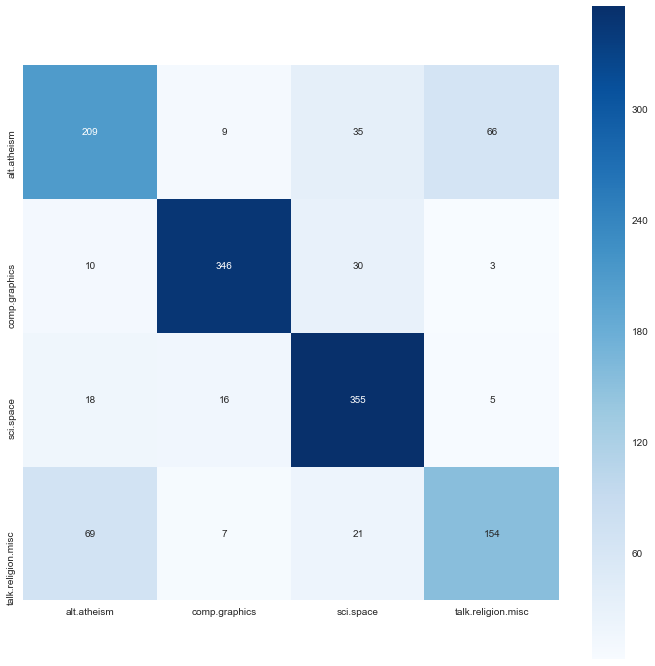

In [44]:
clf_2.fit(vectors_train, y_train)
y_pred = clf_2.predict(vectors_test).astype('int')

print(classification_report(y_test, y_pred, target_names = newsgroups_test.target_names))

df_conf_matrix=pd.DataFrame(confusion_matrix(y_test, y_pred), index=newsgroups_test.target_names,
                            columns = newsgroups_test.target_names)
plt.figure(figsize=(12,12))
sns.heatmap(df_conf_matrix, 
            cmap=plt.cm.Blues, square=True, annot=True, fmt='.3g', )

In [45]:
show_top10(clf, vectorizer_Tfidf, newsgroups_train.target_names)

alt.atheism: [like believe say atheism does just think don people god]
comp.graphics: [software images files data use file jpeg edu graphics image]
sci.space: [just shuttle time orbit data like earth launch nasa space]
talk.religion.misc: [know say christian think just bible don jesus people god]


### 2.4 В чём проблема?

Как вы заметили, качество немного улучшилось. Как вы думаете почему у нас до сих пор есть ошибки? В чём проблема? Опирайтесь на вывод топа 10 важных слов, confusion matrix и репорт классификации.

**Задание**: Напишите развернутое рассуждение.

Ответ: Трудно отделить тексты  категории alt.atheism и talk.religion.misc в них топ важных слов имеет пересечения - god, people, think, just, don, say. Самый общий ответ, который все объясняет, но ничего не проясняет - "Так устроено пространство данных".

![](https://i.imgur.com/3D5pgrk.png)

Можно еще немного улучшить качество предсказания, если использовть n-граммы, то есть не только одиночные слова, но и пары, тройки. Для этого у векторайзера есть параметр `ngram_range`, но будьте осторожны, сгенерируется очень много признаков. Их количество можно ограничить  `max_features`. Ещё можно копать в сторону правильного процессинга текстов: лемматизация и стемминг, чтобы убирать окончания, но это обчно не сильно помогает в английском языке.

Кроме того можно было бы пойти совсем в другую сторону и использовать word-2-vec технологии, тогда бы у нас слова начал "обретать" смысл. Но это вовсем другая история.